In [33]:
import os
import json

import numpy as np

import matplotlib
import matplotlib.pyplot as plt


import detectron2
import detectron2.data.transforms as T

import labelme
from labelme import LabelFile
from labelme import utils
import imgviz

In [34]:
# Load image and polygon mask from all json files in the current directory
# Output a list of images in np arrays and a list of polygon masks in no array
imgs = []
polygon_list = []
path = "./"
valid_filetype = [".json"]
for file in os.listdir(path):
    ext = os.path.splitext(file)[1] # find he extension of the file
    if ext.lower() not in valid_filetype:
        continue
    data = json.load(open(file))
    # Append images to a list of nd arrays
    img_data = data.get("imageData")
    img = labelme.utils.img_b64_to_arr(img_data) # load image to np array
    imgs.append(img)
    # Append mask to a list of polygons
    poly = data.get("shapes")
    poly_for_single_img = []
    for polyitem in poly:
        polygon = np.array(polyitem.get("points"))
        polygon = np.reshape(polygon,(len(polygon),2))
        poly_for_single_img.append(polygon)
    polygon_list.append(poly_for_single_img)

#print(polygon_list, imgs)
#plt.imshow(imgs[0])
#plt.show()

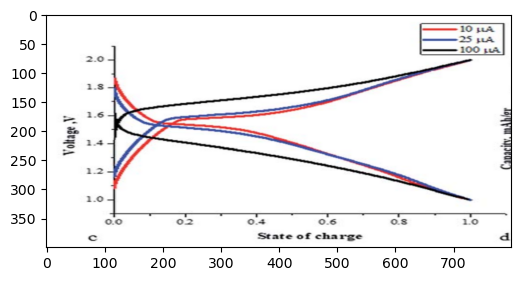

In [35]:
# Rescale the images and masks
# Outputs a list of rescaled images and a list of rescales masks in nparray
matplotlib.rcParams['figure.dpi'] = 100
height = 400 
width = 800
#shortest_edge_len = 300
max_len = 800
new_imgs = []
new_masks = []
encoded_imgs = []
# Resize image and mask to have uniform shrtest lengths
# shortest_edge = T.ResizeShortestEdge(shortest_edge_len, max_len)

for i,img in enumerate(imgs):
    # Scale image to desired width and height
    scale = T.ScaleTransform(np.shape(img)[0],np.shape(img)[1], height, width)
    new_imgs.append(scale.apply_image(img, "bilinear"))
#   encoded_img = utils.img_arr_to_b64(new_imgs[0])
    
    new_masks.append(scale.apply_polygons(polygon_list[i]))    
    #shortest_edge_transform = shortest_edge.get_transform(img)
    #type(shortest_edge_transform)
    #new_imgs.append(shortest_edge_transform.apply_image(img))
    #new_masks.append(shortest_edge_transform.apply_polygons(polygon_list[i]))

plt.imshow(new_imgs[0])
plt.show()

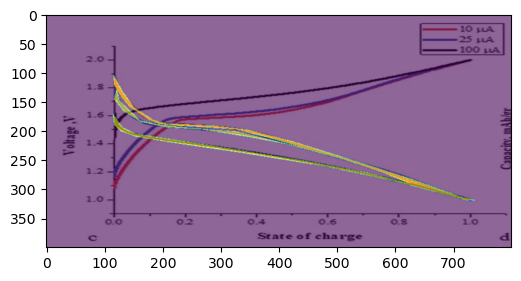

In [42]:
# Check Scaled image and mask
img_num = 0
for index,mask in enumerate(polygon_list[img_num]):
    data["shapes"][index]["points"] = new_masks[img_num][index]

img = new_imgs[0]

label_name_to_value = {"_background_": 0}
for shape in sorted(data["shapes"], key=lambda x: x["label"]):
    label_name = shape["label"]
    if label_name in label_name_to_value:
        label_value = label_name_to_value[label_name]
    else:
        label_value = len(label_name_to_value)
        label_name_to_value[label_name] = label_value
        
lbl, _ = utils.shapes_to_label(img.shape, data["shapes"], label_name_to_value)


label_names = [None] * (max(label_name_to_value.values()) + 1)
for name, value in label_name_to_value.items():
    label_names[value] = name

lbl_viz = imgviz.label2rgb(
    label=lbl, img=imgviz.asgray(img), label_names=label_names, loc="rb"
)

plt.imshow(img,alpha=1)
plt.imshow(lbl, alpha=0.6)
#type(lbl_viz)
#plt.imshow(new_imgs[0])
#plt.show()

In [43]:
def get_dicts(img_dir): #(img_dir)
    json_file = os.path.join(img_dir, "DischargeCurve_annotatedexample.json") #(img_dir) (via_export_json.json) (jason_file)
    with open(json_file) as f: #(jason_file)
        imgs_anns = json.load(f) #(imgs_anns)
    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()): # (idx)* (v)
        record = {}
        
        filename = os.path.join(img_dir, v["filename"]) #(filename) (img_dir) (v)
        height, width = cv2.imread(filename).shape[:2] #(filename)
        
        record["file_name"] = filename #(filename)
        record["image_id"] = idx #(idx)*
        record["height"] = height 
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for anno in annos:
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]
            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)], #(bbox)
                "bbox_mode": BoxMode.XYXY_ABS, #(bbox_mode)
                "segmentation": [poly],
                "category_id": 0,
                "iscrowd": 0
                }
            objs.append(obj)
            print(objs)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

"""
As I only have 1 class (mango), the category_id is set to 0

iscrowd is 0 because our mango detection is a single object segmentation



"""

'\nAs I only have 1 class (mango), the category_id is set to 0\n\niscrowd is 0 because our mango detection is a single object segmentation\n\n\n\n'

In [53]:
img_dir = "./"
json_file = os.path.join("./", "DischargeCurve_annotatedexample.json") #(img_dir) (via_export_json.json) (jason_file)
with open(json_file) as f: #(jason_file)
    imgs_anns = json.load(f) #(imgs_anns)
    dataset_dicts = []
#print(imgs_anns)
for idx, v in enumerate(imgs_anns.values()): # (idx)* (v)
    record = {}
    filename = os.path.join(img_dir, v["filename"]) #(filename) (img_dir) (v)
    height, width = cv2.imread(filename).shape[:2] #(filename)

TypeError: string indices must be integers

In [54]:
v

'3.16.2'

In [47]:
 json_file = os.path.join(img_dir, "DischargeCurve_annotatedexample.json") #(img_dir) (via_export_json.json) (jason_file)
    with open(json_file) as f: #(jason_file)
        imgs_anns = json.load(f) #(imgs_anns)
    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()): # (idx)* (v)
        record = {}
        
        filename = os.path.join(img_dir, v["filename"]) #(filename) (img_dir) (v)
        height, width = cv2.imread(filename).shape[:2] #(filename)
        
        record["file_name"] = filename #(filename)
        record["image_id"] = idx #(idx)*
        record["height"] = height 
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for anno in annos:
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]
            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)], #(bbox)
                "bbox_mode": BoxMode.XYXY_ABS, #(bbox_mode)
                "segmentation": [poly],
                "category_id": 0,
                "iscrowd": 0
                }
            objs.append(obj)
            print(objs)
        record["annotations"] = objs
        dataset_dicts.append(record)

IndentationError: unexpected indent (<ipython-input-47-6a0a1ec1091e>, line 2)

In [37]:
# Update json files and save as in new directory
img_num = 0
for file in os.listdir(path):
    ext = os.path.splitext(file)[1] # find he extension of the file
    if ext.lower() not in valid_filetype:
        continue
    data = json.load(open(file))
    new_filename = file+"_scaled" # create new json filename
    # Update polygon masks information while keeping the keys
    for index,mask in enumerate(polygon_list[img_num]):
        data["shapes"][index]["points"] = new_masks[img_num][index]
    # Update other dictionary information
    data["imageHeight"] = height
    data["imageWidth"] = width
    data["imagePath"] = path+"./Scaled"+new_filename
    data["imageData"] = utils.img_arr_to_b64(imgs[img_num])
    # Save to new json file
    with open(new_filename, 'w') as json_file:
        print("hi")
        json.dump(data, json_file)
    img_num = img_num+1


hi


TypeError: Object of type ndarray is not JSON serializable

In [ ]:
"""
    
    # Update polygon masks information while keeping the keys
    for index,mask in enumerate(polygon_list[img_num]):
        data["shapes"][index]["points"] = polygon_list[img_num][index]

"""

In [17]:
utils.img_arr_to_b64(imgs[img_num])

b'iVBORw0KGgoAAAANSUhEUgAAA7YAAAN8CAYAAABsiTZKAAEAAElEQVR4nOz9V7cc2XWmjT5zrTDp\nM7fFhkdZkqKo/iR16xutc67P3fnTp8foHvrkKIkUWSyHgt3Y3qWLiLXWuYiIzMjEBsqhRAA1HzKQ\nmeFd7RFvvNNICCGgKIqiKIqiKIqiKO8o5s+9A4qiKIqiKIqiKIryY1BhqyiKoiiKoiiKorzTqLBV\nFEVRFEVRFEVR3mlU2CqKoiiKoiiKoijvNCpsFUVRFEVRFEVRlHcaFbaKoiiKoiiKoijKO40KW0VR\nFEVRFEVRFOWdRoWtoiiKoiiKoiiK8k6jwlZRFEVRFEVRFEV5p1FhqyiKoiiKoiiKorzTqLBVFEVR\nFEVRFEVR3mlU2CqKoiiKoiiKoijvNCpsFUVRFEVRFEVRlHcaFbaKoiiKoiiKoijKO40KW0VRFEVR\nFEVRFOWdRoWtoiiKoiiKoiiK8k6jwlZRFEVRFEVRFEV5p1FhqyiKoiiKoiiKorzTqLBVFEVRFEVR\nFEVR3mlU2CqKoiiKoiiKoijvNCpsFUVRFEVRFEVRlHcaFbaKoiiKoiiKoijKO40KW0VRFEVRFEVR\nFOWdRoWtoiiKoiiKoiiK8k6jwlZRFEVRFEVRFEV5p1FhqyiKoiiKoiiKorzTqLBVFEVRFEVRFEVR\n3mlU2CqKoiiKoiiKoijvNNGfewcURVEURVEURVklEL7TfIJU818z7RWrWIyW1RGyPuNLI95fyvO9\nfsKE+iS86lxet0x4xXlbjA5rX14xf/gOF+DV+/WqBdZ24eVJ7ywqbBVFURRFURTlreTbVMt3lCLX\n6TXlGtbFreG7nax6mR9yYl91jfUifV9U2CqKoiiKoijKW0Lt1JafvjF+FVl4tfV0acxdyiJDwDtP\ncAFjDMaYxbqCrMoxCZWUaoz8vmbgu0l1vsUTqIdAfYZNdV68h+CWS4mphkoM++

In [ ]:
    lbf = LabelFile()
    lbf.save(
                   filename=new_filename,
                   shapes=data.get("shapes"),
                   imagePath=path+"./Scaled"+new_filename,
                   imageHeight=height,
                   imageWidth=width,
                   imageData=None)


In [ ]:
# Crop and Pad image and mask
# Use Centerpadtofixedsize() to pad image to fixed size
# Get padded pixels imgaug and move polygon masks to corresponding positions

https://imgaug.readthedocs.io/en/latest/source/api_augmenters_size.html?highlight=padto#imgaug.augmenters.size.CenterPadToFixedSize